# Import Data and Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import pandas as pd

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# y_train = to_categorical(y_train)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


11501568/11490434 [==============================] - 0s 0us/step


# Print Shape Of input data

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_train[0].shape

(28, 28)

# Add one dimension to dataset

In [4]:
image_size= 28
x_train_new = np.array(x_train).reshape(-1, image_size , image_size , 1)
x_test_new = np.array(x_test).reshape(-1, image_size , image_size , 1)
x_train_new.shape[1:]

(28, 28, 1)

# Make CNN model

In [5]:
model = tf.keras.models.Sequential()
## first cnn layer
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = x_train_new.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# second cnn layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2

# Train the model

In [6]:
history = model.fit( x_train_new, y_train, epochs=3, validation_data=(x_test_new, y_test))

Epoch 1/3
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1414 - accuracy: 0.9566 - val_loss: 0.0646 - val_accuracy: 0.9795
Epoch 2/3
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0497 - val_accuracy: 0.9836
Epoch 3/3
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0383 - val_accuracy: 0.9889


In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Evaluate Single dataset

In [8]:
predictions = model.predict(x_test_new)
print(np.argmax(predictions[1335]))

2


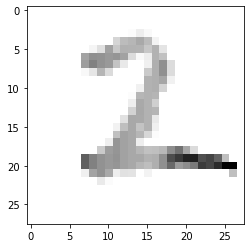

In [9]:
plt.imshow(x_test[1335],cmap=plt.cm.binary)
plt.show()

# Evaluate Test set

In [10]:
y_pred = model.predict(x_test_new)
# y_pred = np.argmax(y_pred);
y_pred=np.apply_along_axis(np.argmax, 1, y_pred)

# Build Confusion Metrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 973    1    0    1    0    0    2    1    2    0]
 [   0 1130    0    2    0    0    2    0    1    0]
 [   2    1 1021    0    0    0    0    6    2    0]
 [   0    1    2 1006    0    0    0    0    1    0]
 [   0    2    1    0  970    0    2    0    0    7]
 [   1    0    1   18    0  870    1    0    0    1]
 [   4    2    0    0    2    2  948    0    0    0]
 [   0    2    5    1    1    0    0 1016    1    2]
 [   1    0    1    3    4    2    0    1  961    1]
 [   0    2    0    6    3    2    0    2    0  994]]


0.9889

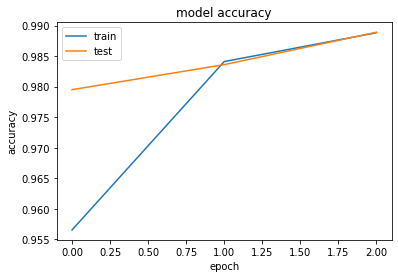

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


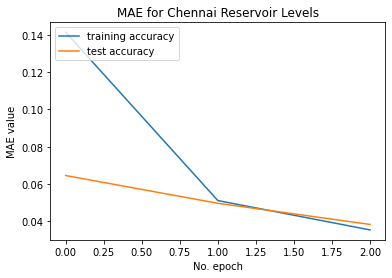

In [13]:
plt.plot(history.history['loss'], label='training accuracy')
plt.plot(history.history['val_loss'], label='test accuracy')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()